# This code uses the ImageProps technique from SciKit Image as a segmentation technique to count dots on dominos

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage import io
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

Read image and check if image is being read

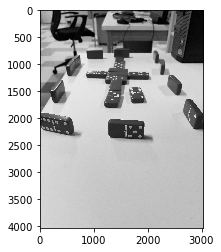

In [17]:
im = io.imread('domino_im.jpg',as_gray=True);
plt.imshow(im,cmap='gray');

Set threshold value

In [18]:
thresh = threshold_otsu(im)
bw = closing(im > thresh, square(3))

Remove artificats to create border on the figure of interest

In [19]:
cleared = clear_border(bw)

Label Image Regions

In [20]:
label_image = label(cleared)
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=im, bg_label=0)

Plotting

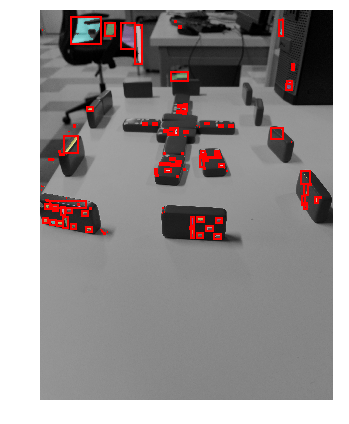

In [21]:
ig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 5:
        # draw rectangle around segmented dots
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()